# The Sparks Foundation Data Science and Business Analytics Internship

# Task-2 Prediction using Unsupervised ML

# Name: Priyanka Jain

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [1]:
#importing necessaray packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing the csv files and setting the column index same as id 
data = pd.read_csv("D:\Iris.csv",index_col='Id')
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#to check the shape of dataset 
data.shape

(150, 5)

In [4]:
#to check for null values  
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
#defining the predictors 
X=data.iloc[:,:-1]
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [6]:
#finding the optimum no of cluster for Kmean classification by using elbow methods 
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist #to calculate the eculidian distance from clusert_centers 

In [7]:
distor=[]
K=range(1,17)
for k in K:
    kmodel=KMeans(n_clusters=k)
    kmodel.fit(X)
    distor.append(sum(np.min(cdist(X,kmodel.cluster_centers_,'euclidean'),axis=1))/X.shape[0])

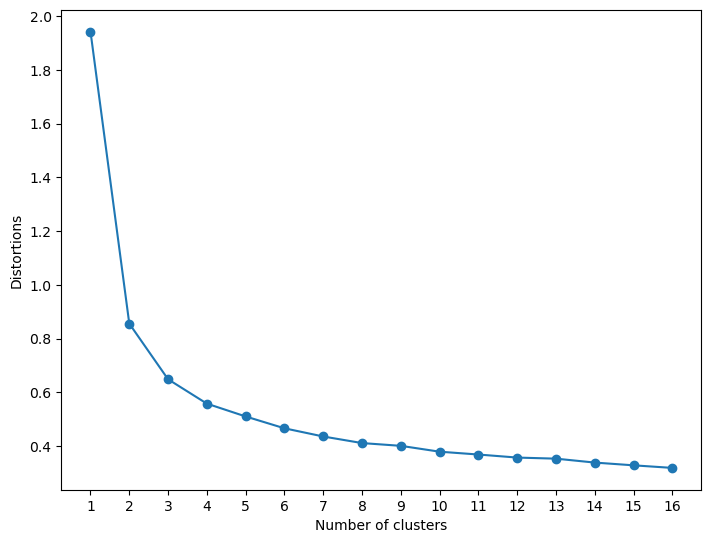

In [8]:
#representing the graph between number of cluster and distortions 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_xticks(range(0,17))
ax.set_xlabel('Number of clusters')
ax.set_ylabel('Distortions')
ax.plot(K, distor, marker='o')
plt.show()

as there is a sharp increase in distortions on the left side of a point where number of cluster is 3 hence we can easily say that optimal number of cluster is ''''3'''' for the given datasets.

In [9]:
#by using 3 number of cluster we are training the KMean model 
model = KMeans(n_clusters=3)
model.fit(X)

KMeans(n_clusters=3)

In [10]:
model.labels_     #predicting the output

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [11]:
# for labeling the column (Species) to corresponding values 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data.Species=le.fit_transform(data.Species)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [12]:
# to check the accuracy_lebal of model 
from sklearn.metrics import accuracy_score
accuracy_score(data.Species,model.labels_)

0.24

In [13]:
# Visualising the clusters On the first two columns
import numpy as np 

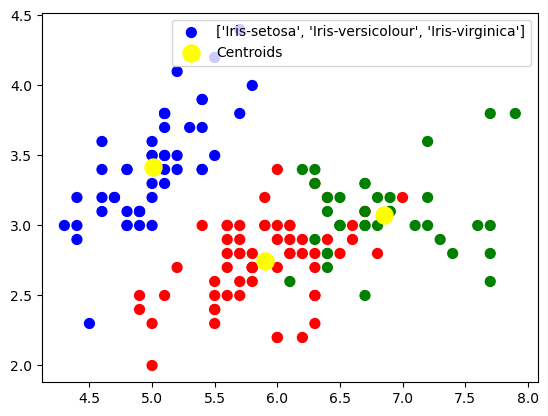

In [14]:
color=np.array(['red','blue','green'])
labels_name=['Iris-setosa','Iris-versicolour','Iris-virginica']
plt.scatter(x=data['SepalLengthCm'],y=data['SepalWidthCm'],s=50,c=color[model.labels_],label=labels_name)
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:,1],s=150, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

Conclusion : We were able to predict the optimum number of clusters and represent it visually from the given ‘Iris’ dataset.